In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

import seaborn as sns
import scipy.stats
from scipy import stats
%matplotlib inline
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Data
tchurn = pd.read_csv('telecom_churn_data.csv', encoding = 'ISO-8859-9')
tchurn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
tchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
tchurn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


##### Data Cleaning

In [5]:
# Set mobile number ad
tchurn = tchurn.set_index('mobile_number')
tchurn.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
# Filtering High value customers as per the given guidelines

tchurn['avg_6_7'] = round(tchurn[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1),2)
tchurn['perc_6_7'] = round(tchurn.avg_6_7.quantile(0.7),2)
tchurn[['total_rech_amt_6', 'total_rech_amt_7', 'avg_6_7', 
        'perc_6_7']].head()

,total_rech_amt_6,total_rech_amt_7,avg_6_7,perc_6_7
mobile_number,,,,
7000842753,362,252,307.0,368.5
7001865778,74,384,229.0,368.5
7001625959,168,315,241.5,368.5
7001204172,230,310,270.0,368.5
7000142493,196,350,273.0,368.5


In [7]:
tchurn = tchurn.loc[(tchurn.avg_6_7 > tchurn.perc_6_7)]
tchurn.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_6_7,perc_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,368.5
7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,...,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,519.0,368.5
7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,205.671,...,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,380.0,368.5
7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,...,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0,368.5
7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,18.980,...,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0,368.5


In [8]:
# creating churn column based on the conditions on the churn phase columns
tchurn['churn'] = (((tchurn.total_ic_mou_9 == 0) | (tchurn.total_og_mou_9 == 0)) &
                  ((tchurn.vol_2g_mb_9 == 0) | (tchurn.vol_3g_mb_9 == 0)))
tchurn['churn'] = tchurn.churn.astype(int)
print(tchurn.churn.value_counts())

0    26936
1     3043
Name: churn, dtype: int64


In [9]:
# renaming columns names having June, sep and Aug with _6,_7,_8

tchurn = tchurn.rename(columns = {'jun_vbc_3g' : 'vbc_3g_6',
                        'jul_vbc_3g' : 'vbc_3g_7',
                        'aug_vbc_3g' : 'vbc_3g_8',
                        'sep_vbc_3g' : 'vbc_3g_9'})

In [10]:
# Dropings columns in the churn phase
col_9 = [col for col in tchurn if col.endswith('_9')]
tchurn = tchurn.drop(col_9, axis =1)
tchurn = tchurn.drop('avg_6_7', axis = 1)
tchurn.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,perc_6_7,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,...,0,NaN,NaN,NaN,802,57.74,19.38,18.74,368.5,1
7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,...,0,NaN,1.0,1.0,315,21.03,910.65,122.16,368.5,0
7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,...,0,NaN,NaN,1.0,2607,0.00,0.00,0.00,368.5,0
7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,...,0,NaN,NaN,NaN,511,0.00,2.45,21.89,368.5,0
7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,25.499,...,0,NaN,NaN,NaN,667,0.00,0.00,0.00,368.5,0


##### Deriving new features

In [11]:
# Converting date column of str object to datetime column
tchurn['last_date_of_month_6'] = tchurn['last_date_of_month_6'].astype('datetime64[ns]')
tchurn['last_date_of_month_7'] = tchurn['last_date_of_month_7'].astype('datetime64[ns]')
tchurn['last_date_of_month_8'] = tchurn['last_date_of_month_8'].astype('datetime64[ns]')
tchurn['date_of_last_rech_6'] = tchurn['date_of_last_rech_6'].astype('datetime64[ns]')
tchurn['date_of_last_rech_7'] = tchurn['date_of_last_rech_7'].astype('datetime64[ns]')
tchurn['date_of_last_rech_8'] = tchurn['date_of_last_rech_8'].astype('datetime64[ns]')
tchurn['date_of_last_rech_data_6'] = tchurn['date_of_last_rech_data_6'].astype('datetime64[ns]')
tchurn['date_of_last_rech_data_7'] = tchurn['date_of_last_rech_data_7'].astype('datetime64[ns]')
tchurn['date_of_last_rech_data_8'] = tchurn['date_of_last_rech_data_8'].astype('datetime64[ns]')

In [12]:
# Creating a columns with number of days since last recharge
tchurn['days_since_last_rech_6'] = tchurn['last_date_of_month_6']-tchurn['date_of_last_rech_6']
tchurn['days_since_last_rech_6']= tchurn['days_since_last_rech_6']/np.timedelta64(1,'D')
tchurn['days_since_last_rech_7'] = tchurn['last_date_of_month_7']-tchurn['date_of_last_rech_7']
tchurn['days_since_last_rech_7']= tchurn['days_since_last_rech_7']/np.timedelta64(1,'D')
tchurn['days_since_last_rech_8'] = tchurn['last_date_of_month_8']-tchurn['date_of_last_rech_8']
tchurn['days_since_last_rech_8']= tchurn['days_since_last_rech_8']/np.timedelta64(1,'D')

tchurn['days_since_last_rech_data_6'] = tchurn['last_date_of_month_6']-tchurn['date_of_last_rech_data_6']
tchurn['days_since_last_rech_data_6']= tchurn['days_since_last_rech_data_6']/np.timedelta64(1,'D')
tchurn['days_since_last_rech_data_7'] = tchurn['last_date_of_month_7']-tchurn['date_of_last_rech_data_7']
tchurn['days_since_last_rech_data_7']= tchurn['days_since_last_rech_data_7']/np.timedelta64(1,'D')
tchurn['days_since_last_rech_data_8'] = tchurn['last_date_of_month_8']-tchurn['date_of_last_rech_data_8']
tchurn['days_since_last_rech_data_8']= tchurn['days_since_last_rech_data_8']/np.timedelta64(1,'D')

In [13]:
# dropping date of last recharge columns
tchurn = tchurn.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8', 
                      'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                     'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis = 1)

In [14]:
# dropping the columns with unique values
unique = tchurn.nunique() == 1
unique_values = [i for i, x in enumerate(unique) if x]
tchurn.iloc[:,unique_values].head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,perc_6_7
mobile_number,,,,,,,,,,,
7000701601,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.5
7001524846,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.5
7002191713,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.5
7000875565,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.5
7000187447,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.5


In [15]:
tchurn = tchurn.drop(tchurn.iloc[:,unique_values], axis = 1)

##### Outlier Treatment

In [16]:
# Checking outliers
tchurn.quantile([.02,.05,.10,.20,0.75,0.90,.95,.98,.99,1])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8,days_since_last_rech_data_6,days_since_last_rech_data_7,days_since_last_rech_data_8
0.02,94.45080,104.02848,0.00000,0.0000,0.0000,0.000,7.4324,8.0000,0.300,0.0000,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.05,202.18100,212.82470,22.22120,3.7410,3.6600,0.880,27.8900,28.3325,9.610,0.0000,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.10,270.69220,274.45820,134.11860,12.0140,11.5100,6.480,57.9640,58.9100,33.140,0.0000,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0,1.0,1.0
0.20,339.26500,339.49840,252.40600,31.3900,31.0100,22.630,114.2600,113.1900,82.330,0.0000,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,2.0,2.0,2.0
0.75,704.18450,700.98600,671.34950,357.6550,365.1275,310.360,527.6050,537.0175,493.760,0.0000,...,1.6000,2.0250,0.0000,0.0,4.0,5.0,6.0,17.0,17.0,18.0
0.90,994.31180,996.05140,985.49920,800.0400,830.3750,745.680,921.1120,938.8000,866.830,33.3040,...,439.1000,455.0780,395.1680,1.0,9.0,9.0,10.0,24.0,24.0,24.0
0.95,1240.97670,1261.84840,1258.70330,1161.3750,1215.8450,1131.530,1275.0500,1291.9425,1201.310,95.4900,...,819.2570,845.4290,762.1220,1.0,13.0,13.0,15.0,26.0,27.0,27.0
0.98,1627.65196,1644.48632,1662.43184,1704.1880,1778.6200,1723.372,1842.8276,1845.4250,1760.260,222.1392,...,1343.0864,1448.6452,1338.8388,1.0,16.0,16.0,22.0,28.0,29.0,29.0
0.99,1983.59010,1999.50968,1988.08226,2174.0328,2228.4350,2221.070,2336.0784,2422.4150,2233.182,350.2908,...,1822.6984,1942.1528,1867.6800,1.0,18.0,20.0,25.0,29.0,29.0,30.0
1.00,27731.08800,35145.83400,33543.62400,7376.7100,8157.7800,10752.560,8362.3600,9667.1300,14007.340,2613.3100,...,12916.2200,9165.6000,11166.2100,1.0,29.0,30.0,30.0,29.0,30.0,30.0


In [17]:
churn = tchurn.pop('churn')
tchurn_clean = tchurn

In [18]:
# Removing .05% of the data on both the ends to overcome outliers in the data
low = .05
high = .95
quant_df = tchurn_clean.quantile([low, high])

tchurn_clean = tchurn_clean.apply(lambda x: x[(x>quant_df.loc[low,x.name]) &
                                              (x < quant_df.loc[high,x.name])], axis=0)

tchurn = pd.concat([tchurn_clean,churn],axis=1)
tchurn.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,vbc_3g_8,vbc_3g_7,vbc_3g_6,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8,days_since_last_rech_data_6,days_since_last_rech_data_7,days_since_last_rech_data_8,churn
count,26981.000000,26981.000000,26981.000000,26695.000000,26707.000000,26131.000000,26694.000000,26708.000000,26135.000000,5527.000000,...,6158.000000,6163.000000,5717.000000,19576.000000,20242.000000,21160.000000,9763.000000,10172.000000,10124.000000,29979.000000
mean,547.613695,548.046912,492.965140,231.438965,236.558082,204.601240,361.017439,365.029505,324.656217,23.453819,...,270.578464,278.821248,252.674772,3.497803,3.748049,4.171408,10.294889,10.513173,11.070427,0.101504
std,225.340058,225.877744,258.395362,257.205761,266.584207,242.406929,272.400681,278.707710,264.600614,24.121231,...,225.905689,236.439853,213.130091,2.744477,2.763177,3.097341,7.196556,7.515835,7.638496,0.302000
min,202.200000,212.832000,22.225000,3.750000,3.680000,0.890000,27.910000,28.340000,9.660000,0.010000,...,0.020000,0.020000,0.020000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,377.091000,377.416000,307.750000,49.030000,48.560000,37.840000,154.380000,153.540000,120.890000,4.390000,...,72.362500,72.790000,64.930000,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,0.000000
50%,495.951000,493.781000,452.232000,128.480000,128.130000,106.430000,286.035000,285.630000,251.530000,14.000000,...,214.305000,216.940000,198.610000,3.000000,3.000000,3.000000,9.000000,9.000000,10.000000,0.000000
75%,674.554000,672.701000,641.704000,319.550000,324.075000,275.010000,492.905000,499.665000,458.860000,35.600000,...,431.662500,446.870000,406.020000,5.000000,6.000000,6.000000,16.000000,17.000000,18.000000,0.000000
max,1240.964000,1261.836000,1258.623000,1161.330000,1215.680000,1130.830000,1274.690000,1291.910000,1201.280000,95.430000,...,819.210000,845.420000,762.120000,12.000000,12.000000,14.000000,25.000000,26.000000,26.000000,1.000000


###### Null Value Treatment

In [19]:
#Checking the null value percentage in columns

round(tchurn.isnull().mean()*100, 2)

arpu_6                          10.00
arpu_7                          10.00
arpu_8                          10.00
onnet_mou_6                     10.95
onnet_mou_7                     10.91
onnet_mou_8                     12.84
offnet_mou_6                    10.96
offnet_mou_7                    10.91
offnet_mou_8                    12.82
roam_ic_mou_6                   81.56
roam_ic_mou_7                   85.82
roam_ic_mou_8                   85.01
roam_og_mou_6                   81.28
roam_og_mou_7                   85.55
roam_og_mou_8                   84.94
loc_og_t2t_mou_6                12.79
loc_og_t2t_mou_7                11.97
loc_og_t2t_mou_8                17.08
loc_og_t2m_mou_6                10.96
loc_og_t2m_mou_7                10.92
loc_og_t2m_mou_8                13.85
loc_og_t2f_mou_6                52.34
loc_og_t2f_mou_7                51.10
loc_og_t2f_mou_8                53.97
loc_og_t2c_mou_6                80.63
loc_og_t2c_mou_7                78.95
loc_og_t2c_m

In [20]:
#Removing columns with more than 60% NULLS
tchurn = tchurn.loc[:, tchurn.isnull().mean() < .6]
print(tchurn.shape)
print(tchurn.churn.value_counts())

(29979, 77)
0    26936
1     3043
Name: churn, dtype: int64


In [21]:
round(tchurn.isnull().mean()*100, 2)

arpu_6                    10.00
arpu_7                    10.00
arpu_8                    10.00
onnet_mou_6               10.95
onnet_mou_7               10.91
onnet_mou_8               12.84
offnet_mou_6              10.96
offnet_mou_7              10.91
offnet_mou_8              12.82
loc_og_t2t_mou_6          12.79
loc_og_t2t_mou_7          11.97
loc_og_t2t_mou_8          17.08
loc_og_t2m_mou_6          10.96
loc_og_t2m_mou_7          10.92
loc_og_t2m_mou_8          13.85
loc_og_t2f_mou_6          52.34
loc_og_t2f_mou_7          51.10
loc_og_t2f_mou_8          53.97
loc_og_mou_6              10.97
loc_og_mou_7              10.91
loc_og_mou_8              13.31
std_og_t2t_mou_6          40.35
std_og_t2t_mou_7          40.38
std_og_t2t_mou_8          45.25
std_og_t2m_mou_6          25.10
std_og_t2m_mou_7          25.75
std_og_t2m_mou_8          30.76
std_og_mou_6              19.68
std_og_mou_7              20.23
std_og_mou_8              24.96
                          ...  
loc_ic_m

In [22]:
# checking null values row wise column count
tchurn.isnull().sum(axis=1)

mobile_number
7000000074    15
7000000229    15
7000000256    23
7000000267     8
7000000314     4
7000000559    12
7000000576    13
7000000656     3
7000000809    13
7000000833    11
7000000855     9
7000000856    15
7000000926     8
7000000935     9
7000001037    49
7000001221    11
7000001327    10
7000001763    10
7000001771     7
7000001861     6
7000001909    30
7000001992    21
7000002091    23
7000002325    14
7000002374    10
7000002410    14
7000002461    11
7000002508     8
7000002561    19
7000002673     9
              ..
7002408583    30
7002408617    22
7002408623    13
7002408645    26
7002408742     7
7002408982    17
7002409051    24
7002409055    16
7002409098     9
7002409132    39
7002409282    20
7002409436    11
7002409446    16
7002409465    11
7002409710    11
7002409723    16
7002409752    12
7002409828    15
7002409911    44
7002409923    25
7002409950     4
7002409985     6
7002410111    15
7002410280    68
7002410327     4
7002410386     7
7002410408    29


In [23]:
tchurn.churn.value_counts()

0    26936
1     3043
Name: churn, dtype: int64

In [24]:
# Imputing null values with mean values
tchurn = tchurn.fillna(tchurn.mean())
tchurn.isnull().sum(axis=1)

mobile_number
7000000074    0
7000000229    0
7000000256    0
7000000267    0
7000000314    0
7000000559    0
7000000576    0
7000000656    0
7000000809    0
7000000833    0
7000000855    0
7000000856    0
7000000926    0
7000000935    0
7000001037    0
7000001221    0
7000001327    0
7000001763    0
7000001771    0
7000001861    0
7000001909    0
7000001992    0
7000002091    0
7000002325    0
7000002374    0
7000002410    0
7000002461    0
7000002508    0
7000002561    0
7000002673    0
             ..
7002408583    0
7002408617    0
7002408623    0
7002408645    0
7002408742    0
7002408982    0
7002409051    0
7002409055    0
7002409098    0
7002409132    0
7002409282    0
7002409436    0
7002409446    0
7002409465    0
7002409710    0
7002409723    0
7002409752    0
7002409828    0
7002409911    0
7002409923    0
7002409950    0
7002409985    0
7002410111    0
7002410280    0
7002410327    0
7002410386    0
7002410408    0
7002410671    0
7002410903    0
7002410905    0
Length: 29

##### Dimensionality reduction using manual approach

In [25]:
# Merging 6th and 7th month columns to good pahse 

filter_col_6 = [col for col in tchurn if col.endswith('_6')]
filter_col_7 = [col for col in tchurn if col.endswith('_7')]

In [26]:
# taking the average of 6th and 7th month attributes into one attribute row wise

for i, j in zip(filter_col_6, filter_col_7):
    tchurn[i] = round(tchurn[[i,j]].median(axis =1), 2)
tchurn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,...,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000000074,547.83,548.046912,492.96514,164.46,164.63,111.28,983.51,824.540000,755.030000,119.40,...,252.0,252.0,189.0,250.0,250.000000,258.000000,3.62,3.748049,4.0,0
7000000229,516.46,768.759000,725.01400,133.41,35.39,30.96,345.89,330.760000,160.380000,36.98,...,350.0,155.0,114.0,128.0,130.000000,1199.572927,5.00,3.000000,12.0,0
7000000256,1078.55,1260.650000,492.96514,651.83,428.23,784.58,381.83,365.029505,324.656217,5.20,...,120.0,130.0,57.5,65.0,130.000000,1199.572927,3.62,3.748049,1.0,0
7000000267,318.95,232.140000,476.22400,77.82,100.76,158.71,106.17,118.660000,103.480000,72.84,...,250.0,252.0,180.0,250.0,95.906045,419.000000,3.62,3.748049,5.0,0
7000000314,725.41,653.802000,640.93500,84.69,96.14,74.61,534.92,531.110000,617.760000,57.14,...,128.0,154.0,22.5,25.0,30.000000,312.000000,2.37,3.748049,4.0,0


In [27]:
# dropping 7th month columns
tchurn = tchurn.drop(filter_col_7, axis = 1)

In [28]:
# replacing _6 with gp which is good phase
tchurn.columns = tchurn.columns.str.replace('_6','_gp')

In [29]:
# replacing _8 with action phase i.e. ap
tchurn.columns = tchurn.columns.str.replace('_8','_ap')

##### Data Visualization

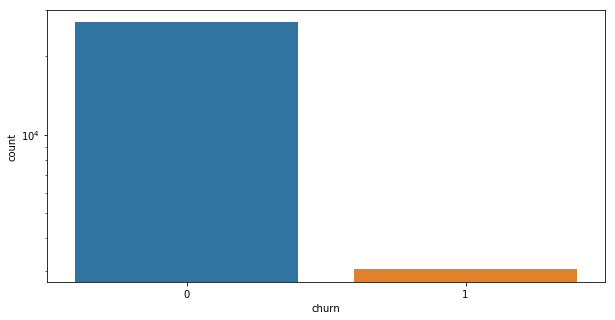

In [30]:
# Checking for class imbalance
plt.figure(figsize=(10,5))
sns.countplot(tchurn.churn)
plt.yscale('log')

In [31]:
tchurn.churn.value_counts()

0    26936
1     3043
Name: churn, dtype: int64

Analysis: so we can clearly see that there is class imbalance as churn class has only 10.15% of the total data

In [32]:
def continuousplot(gp,ap):
 plt.figure(figsize=(15,5))
 plt.subplot(1, 2, 1)
 ax1 = sns.boxplot(x = 'churn', y = gp, data = tchurn)
 plt.title('Good Phase')
 plt.yscale('log')
 plt.subplot(1, 2, 2, sharey = ax1)
 sns.boxplot(x = 'churn', y = ap, data = tchurn)
 plt.title('Action Phase')
 plt.yscale('log')
 plt.show()

def continuousplot1(gp):
 plt.figure(figsize=(15,5))
 plt.subplot(1, 2, 1)
 sns.boxplot(x = 'churn', y = gp, data = tchurn)
 plt.yscale('log')

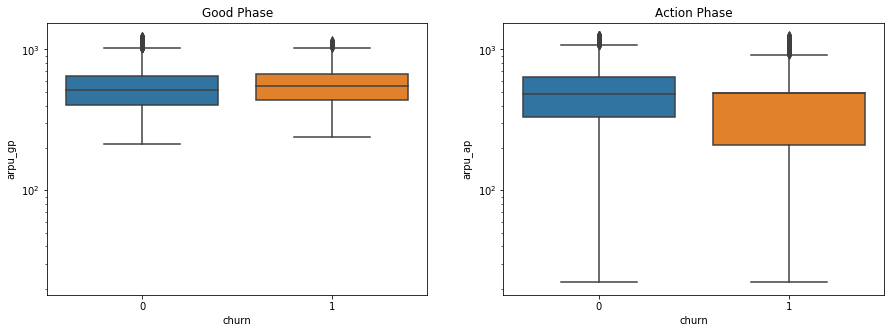

In [33]:
continuousplot('arpu_gp', 'arpu_ap')

Analysis: As per the above graph we can clearly see that the average revenue per user has drastically decreased in action phase for churners and slightly reduced for non churners so need to be cautioned

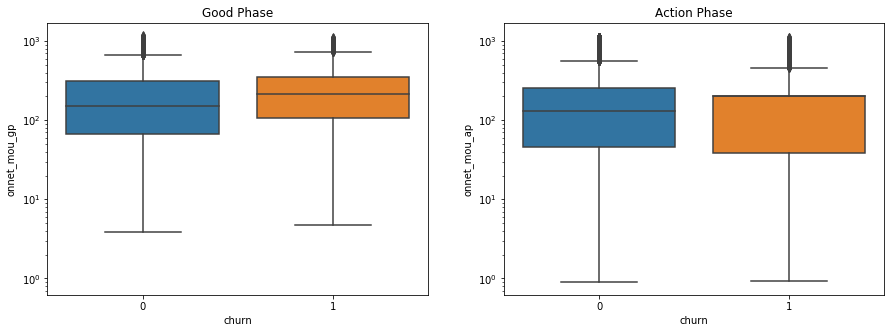

In [34]:
continuousplot('onnet_mou_gp', 'onnet_mou_ap')

Analysis: onnetwork minutes of usage of churners is decereased in action phase whereas it is increased for non churners in good phase

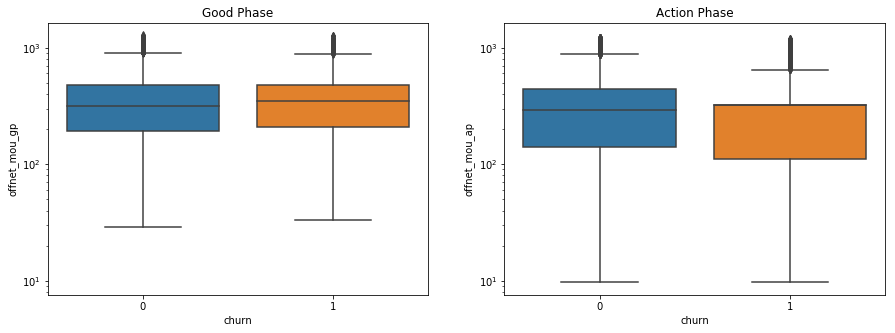

In [35]:
continuousplot('offnet_mou_gp','offnet_mou_ap')

Analysis: offnetwork minutes of usage is also decreased for churners where as it is stable for non churners

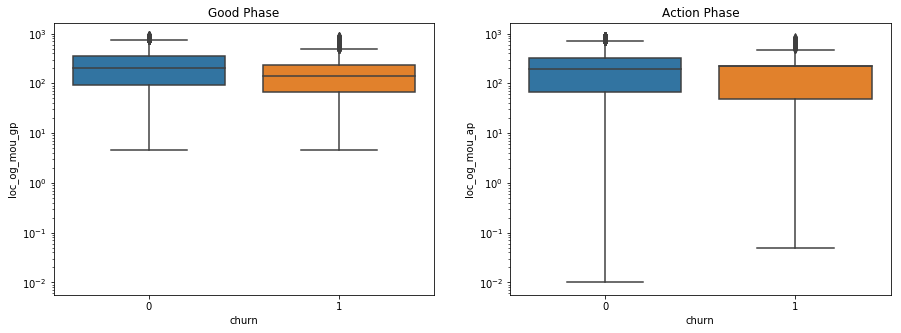

In [36]:
continuousplot('loc_og_mou_gp', 'loc_og_mou_ap')

Analysis: Outgoing calls minutes of usage on the local network is also reduced in action phase for the churners and it is stable for the non churners

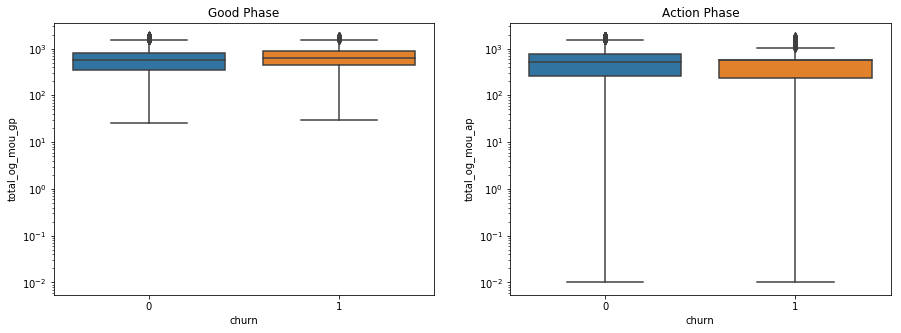

In [37]:
continuousplot('total_og_mou_gp', 'total_og_mou_ap')

Analysis: Total outgoing calls minutes of usage has decreased for churners in action phase where as it slightly increased for non churners

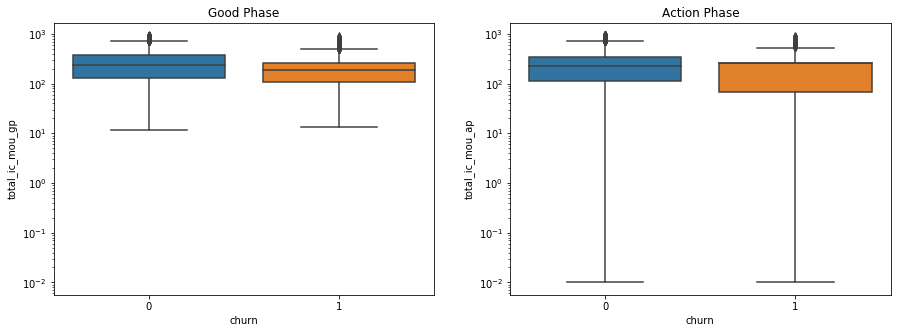

In [38]:
continuousplot('total_ic_mou_gp', 'total_ic_mou_ap')

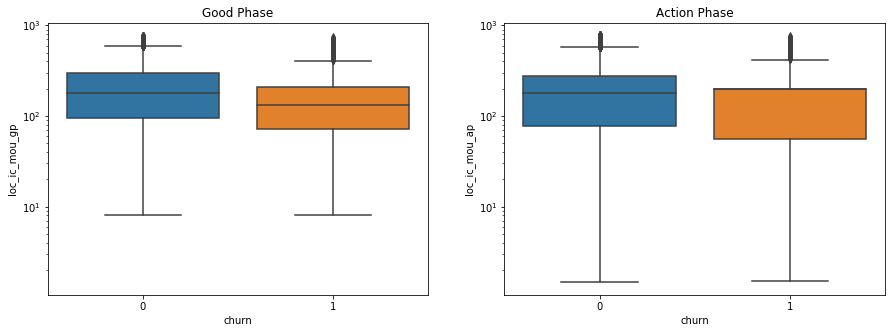

In [39]:
continuousplot('loc_ic_mou_gp', 'loc_ic_mou_ap')

Analysis: Incoming call for churners reduced in action phase where as it increased for non churners

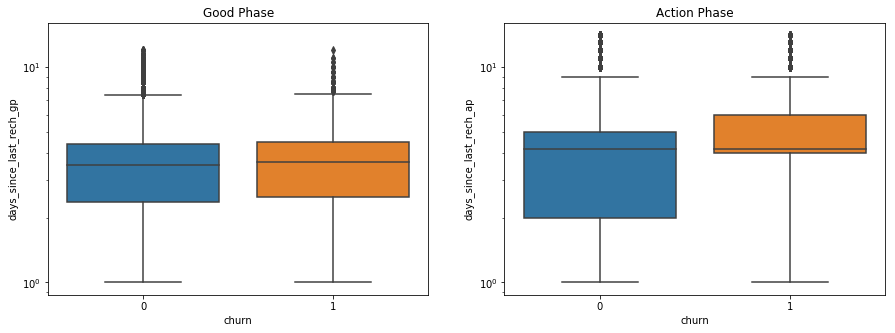

In [40]:
continuousplot('days_since_last_rech_gp', 'days_since_last_rech_ap')

Analysis: As per the above plot we can depict that in good phase churners and the non churners are almost equal but in action phase we can see that churners are not recharging for more number of days than that of the non churners

In [41]:
churn = tchurn['churn']
tchurn = tchurn.drop('churn', axis = 1)

In [42]:
# Scaling the data
tchurn =(tchurn-tchurn.mean())/tchurn.std()
tchurn = pd.concat([churn, tchurn],axis=1)
tchurn.head()

,churn,arpu_gp,arpu_ap,onnet_mou_gp,onnet_mou_ap,offnet_mou_gp,offnet_mou_ap,loc_og_t2t_mou_gp,loc_og_t2t_mou_ap,loc_og_t2m_mou_gp,...,total_rech_num_ap,total_rech_amt_gp,total_rech_amt_ap,max_rech_amt_gp,max_rech_amt_ap,last_day_rch_amt_gp,last_day_rch_amt_ap,aon,days_since_last_rech_gp,days_since_last_rech_ap
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000000074,0,-0.000002,7.953714e-14,-0.312978,-0.412351,2.686565,1.742021e+00,0.978865,0.752315,-0.000009,...,0.355361,0.000001,8.113132e-14,1.495105,1.474380,2.030124,2.949584e+00,-1.176402e+00,-0.001199,-0.065871
7000000229,0,-0.173472,9.466187e-01,-0.452728,-0.767255,-0.074182,-6.649396e-01,-0.411109,-0.869154,-0.995990,...,0.172046,-0.202091,9.690469e-01,1.495105,0.139147,0.418598,6.526083e-01,9.147402e-14,0.826270,3.008489
7000000256,0,2.934788,7.953714e-14,1.880574,2.562705,0.081430,-1.173432e-14,-0.947063,-0.712809,-0.992672,...,2.921773,2.788928,8.113132e-14,-0.449504,-0.204986,-0.795419,6.526083e-01,9.147402e-14,-0.001199,-1.218756
7000000267,0,-1.265668,-6.829371e-02,-0.702927,-0.202776,-1.112114,-8.952534e-01,0.193653,1.544603,-0.560041,...,-0.927845,-1.007006,-2.558041e-01,1.480373,1.474380,1.836741,3.109150e-13,-9.752483e-01,-0.001199,0.318424
7000000314,0,0.981985,6.036273e-01,-0.672006,-0.574382,0.744274,1.186394e+00,-0.071120,0.247363,0.849826,...,-0.011269,1.461401,1.284628e-01,-0.140134,0.125381,-1.547464,-1.261538e+00,-1.108934e+00,-0.750719,-0.065871


In [43]:
# Calculating the churn rate
churn = (sum(tchurn['churn'])/len(tchurn['churn'].index))*100
churn

10.150438640381601

We have only 10.15 percent of churn rate which is very low so we need to overcome the class imbalance issue here

#### Model Building

In [44]:
# Splitting data into training and test sets

from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = tchurn.drop('churn',axis=1)

# Putting response variable to y
y = tchurn['churn']

y.head()

mobile_number
7000000074    0
7000000229    0
7000000256    0
7000000267    0
7000000314    0
Name: churn, dtype: int32

In [45]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100,stratify=y)

#### Model 1: PCA

In [46]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [47]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [48]:
pca.components_

array([[ 7.95537283e-02,  9.91928260e-02, -4.99377714e-02, ...,
         1.07674383e-01,  2.93948384e-02,  1.02751684e-02],
       [ 2.22674347e-01,  2.33925110e-01,  2.17044590e-01, ...,
        -6.46993181e-02, -1.02300812e-01, -9.24361526e-02],
       [ 4.84114212e-02,  5.08739978e-02, -1.30747237e-01, ...,
         3.23320908e-02,  1.39805220e-01,  1.09900686e-01],
       ...,
       [-2.80509770e-01, -2.58551447e-02, -2.38155168e-01, ...,
        -4.81163001e-03, -6.21874501e-04, -5.49181487e-03],
       [-6.52767909e-01, -4.85216723e-02,  9.82875563e-02, ...,
         1.60612969e-03,  3.22744492e-03,  2.15909575e-03],
       [ 2.81886008e-02, -7.63538001e-03,  1.49667798e-02, ...,
         1.56462964e-03,  1.33963979e-04,  6.76411402e-04]])

In [49]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.079554,0.222674,arpu_gp
1,0.099193,0.233925,arpu_ap
2,-0.049938,0.217045,onnet_mou_gp
3,-0.024547,0.232640,onnet_mou_ap
4,0.072681,0.208224,offnet_mou_gp


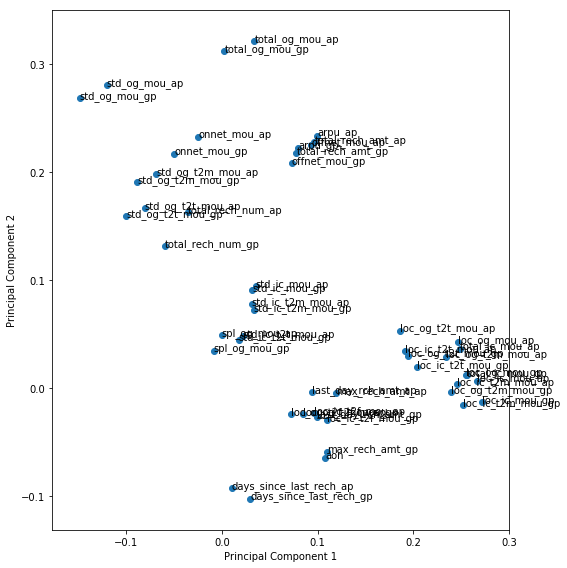

In [50]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [51]:
#Looking at the scree plots to know the number of needed components

pca.explained_variance_ratio_

array([0.17796121, 0.11726846, 0.06214058, 0.05940348, 0.05475059,
       0.03858907, 0.03292701, 0.03154853, 0.02704565, 0.02683651,
       0.02274822, 0.02082587, 0.02022864, 0.01831242, 0.016742  ,
       0.016375  , 0.01587444, 0.01560765, 0.01481137, 0.013502  ,
       0.01277461, 0.01187462, 0.01171064, 0.01158843, 0.01092638,
       0.01059418, 0.01038895, 0.00937883, 0.00884283, 0.0084795 ,
       0.00737449, 0.00692184, 0.00676552, 0.00661597, 0.00647419,
       0.00629958, 0.00606656, 0.00494242, 0.00481071, 0.00406202,
       0.00392003, 0.00367186, 0.00324651, 0.00302393, 0.00287435,
       0.00268805, 0.00256219, 0.00217634, 0.00193263, 0.00188825,
       0.0016249 ])

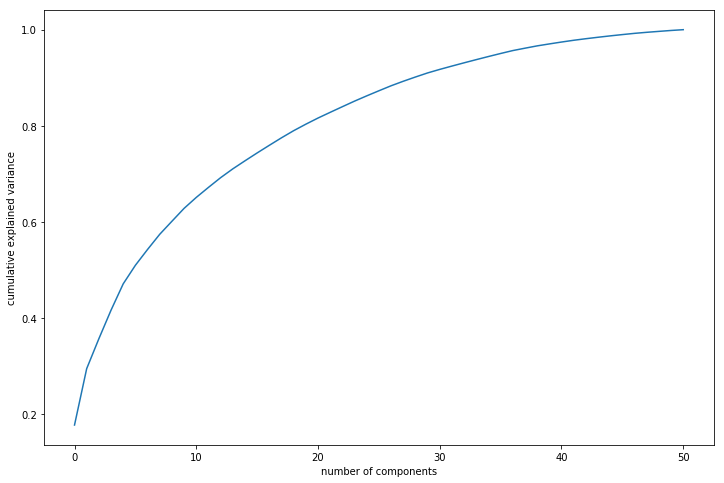

In [52]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [53]:
# selecting features based on 95% variance
pca_again = PCA(0.95)

In [54]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape
# we see that PCA selected 36 components

(20985, 36)

##### Model 2: Logistic Regression on PCA Data

In [55]:
#training the regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [56]:
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [57]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(8994, 36)

In [58]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.77'

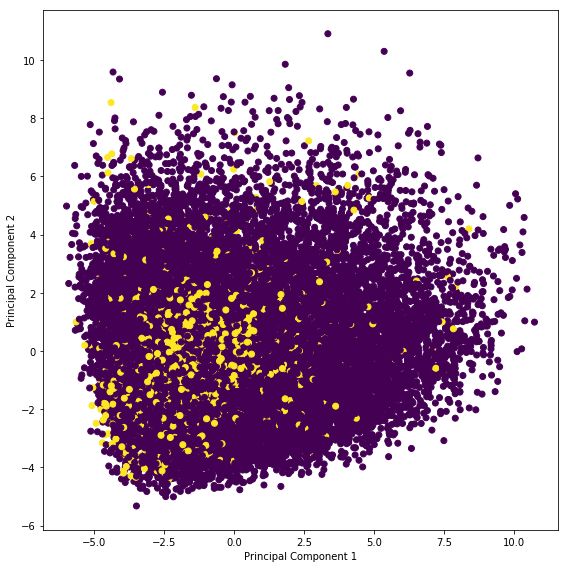

In [59]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca2[:,0], df_train_pca2[:,1], c = y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [60]:
#Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_train_pred_default = model_pca2.predict(df_test_pca2)

# Printing classification report
print(classification_report(y_test, y_train_pred_default))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      8081
           1       0.46      0.05      0.08       913

    accuracy                           0.90      8994
   macro avg       0.68      0.52      0.51      8994
weighted avg       0.86      0.90      0.86      8994



As precision and recall for non churn is high and is low for churn values which is attributed to class imbalance so using Smote technique to overcome the class imbalance.

In [61]:
#pip install imblearn

##### Model 3: PCA after class balancing

In [62]:
# Using Smote to overcome class imbalance in the data

from imblearn.over_sampling import SMOTE 
smot = SMOTE(random_state = 2) 
X_train_res, y_train_res = smot.fit_sample(X_train, y_train.ravel())

In [63]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 2130
Before OverSampling, counts of label '0': 18855 

After OverSampling, the shape of train_X: (37710, 51)
After OverSampling, the shape of train_y: (37710,) 

After OverSampling, counts of label '1': 18855
After OverSampling, counts of label '0': 18855


In [64]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [65]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [66]:
pca.components_

array([[ 9.73315308e-02,  1.46760072e-01, -5.27882807e-02, ...,
         1.10330978e-01,  3.04832938e-02, -1.17024727e-02],
       [ 2.24810997e-01,  2.30806134e-01,  2.25525951e-01, ...,
        -6.49279549e-02, -8.58993002e-02, -8.27438460e-02],
       [-5.05873915e-02, -4.72632521e-03,  4.02414906e-01, ...,
         5.55489865e-02,  2.78343899e-02,  1.85840596e-02],
       ...,
       [ 3.89176696e-01, -1.07841345e-02, -1.73517635e-01, ...,
        -4.08169562e-03, -3.94186587e-03, -6.16849125e-03],
       [ 6.17282347e-02,  4.04833107e-03,  3.00046705e-02, ...,
         3.35631571e-03, -7.96843255e-04, -2.68785395e-04],
       [ 4.53298387e-03, -2.29811396e-03,  2.36137743e-02, ...,
         8.00480843e-04, -1.50877473e-03,  2.80050578e-03]])

In [67]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.097332,0.224811,arpu_gp
1,0.146760,0.230806,arpu_ap
2,-0.052788,0.225526,onnet_mou_gp
3,0.004283,0.227358,onnet_mou_ap
4,0.071383,0.205256,offnet_mou_gp


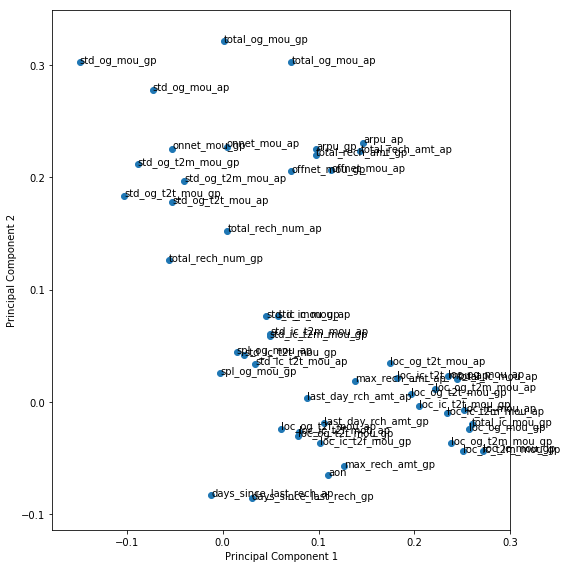

In [68]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [69]:
#Looking at the scree plots to know the number of needed components

pca.explained_variance_ratio_

array([0.17265262, 0.1140672 , 0.06116595, 0.0590575 , 0.0546834 ,
       0.04271638, 0.03881736, 0.02804274, 0.0254523 , 0.02389538,
       0.02304791, 0.02208961, 0.02102147, 0.01986063, 0.01880124,
       0.01739524, 0.01699602, 0.01633113, 0.01563912, 0.01516382,
       0.01467569, 0.01351721, 0.01185824, 0.01144479, 0.01049588,
       0.01014935, 0.00942091, 0.00882054, 0.00826827, 0.00783113,
       0.00741752, 0.00714871, 0.00665518, 0.0065349 , 0.00593103,
       0.00566774, 0.00553724, 0.00516913, 0.00434006, 0.00386262,
       0.00379647, 0.00331233, 0.00304765, 0.00294654, 0.00277554,
       0.00262522, 0.00236825, 0.00208191, 0.00204269, 0.00187237,
       0.00148787])

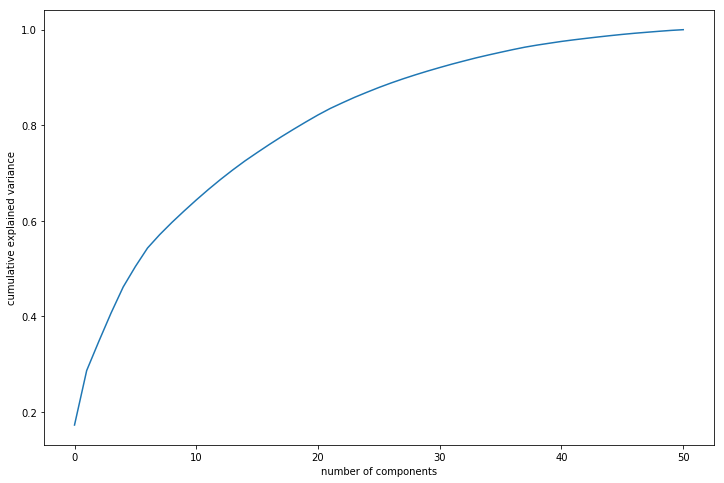

In [70]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [71]:
# selecting features based on 95% variance
pca_again = PCA(0.95)

In [72]:
df_train_pca2 = pca_again.fit_transform(X_train_res)
df_train_pca2.shape
# we see that PCA selected 36 components

(37710, 36)

In [73]:
#training the regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train_res)

In [74]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(8994, 36)

In [75]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.76'

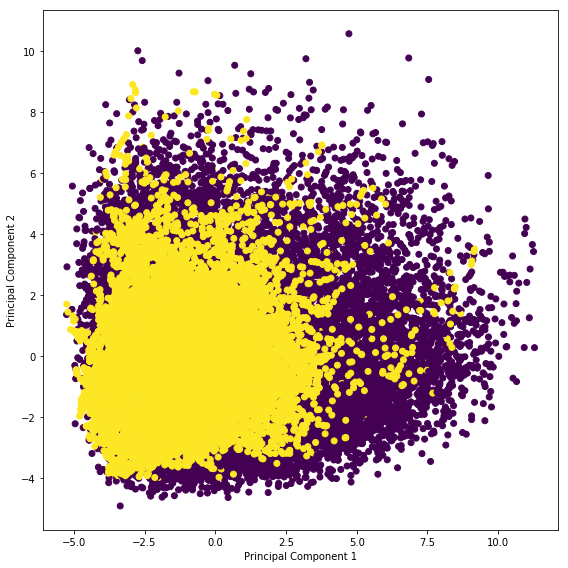

In [76]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca2[:,0], df_train_pca2[:,1], c = y_train_res)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [77]:
pca_last = PCA(n_components=36)
df_train_pca3 = pca_last.fit_transform(X_train_res)
df_test_pca3 = pca_last.transform(X_test)
df_test_pca3.shape

(8994, 36)

##### Model 4: Logistic Regression on class balanced PCA data

In [78]:
#training the regression model
learner_pca3 = LogisticRegression()
model_pca3 = learner_pca3.fit(df_train_pca3,y_train_res)
#Making prediction on the test data
pred_probs_test3 = model_pca3.predict_proba(df_test_pca3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test3))

'0.76'

In [79]:
#Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_train_pred_default = model_pca3.predict(df_test_pca3)

# Printing classification report
print(classification_report(y_test, y_train_pred_default))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81      8081
           1       0.21      0.70      0.33       913

    accuracy                           0.71      8994
   macro avg       0.58      0.70      0.57      8994
weighted avg       0.88      0.71      0.77      8994



##### Predictions

In [80]:
# Predicted probabilities
y_test_pred = learner_pca3.predict_proba(df_test_pca3)
# Converting y_test_pred to a dataframe which is an array
y_test_pred_df = pd.DataFrame(y_test_pred)
# Converting to column dataframe
y_test_pred_1 = y_test_pred_df.iloc[:,[1]]
# Let's see the head
y_test_pred_1.head()

,1
0,0.049254
1,0.509261
2,0.104345
3,0.659273
4,0.169470


In [81]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
mobile_number,
7000739057,0
7000767750,0
7001211870,0
7000472921,0
7002388445,1


In [82]:
y_test_pred_1['mobile_number'] = y_test_df.index

In [83]:
# Removing index for both dataframes to append them side by side 
#y_train_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df,y_test_pred_1],axis=1)
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={1:'Churn_Prob'})
y_test_pred_final.head()

,churn,Churn_Prob,mobile_number
0,0,0.049254,7000739057
1,0,0.509261,7000767750
2,0,0.104345,7001211870
3,0,0.659273,7000472921
4,1,0.169470,7002388445


In [84]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_test_pred_final.head()

,churn,Churn_Prob,mobile_number,predicted
0,0,0.049254,7000739057,0
1,0,0.509261,7000767750,1
2,0,0.104345,7001211870,0
3,0,0.659273,7000472921,1
4,1,0.169470,7002388445,0


##### Model Evaluation metrics

In [85]:
from sklearn import metrics

In [86]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_test_pred_final.churn, y_test_pred_final.predicted )
confusion

array([[5749, 2332],
       [ 278,  635]], dtype=int64)

In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
sensitivity = TP/(TP+FN)
sensitivity

0.6955093099671413

In [89]:
specificity = TN/(TN+FP)
specificity

0.7114218537309739

In [90]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.predicted)

0.7098065376917946

In [91]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

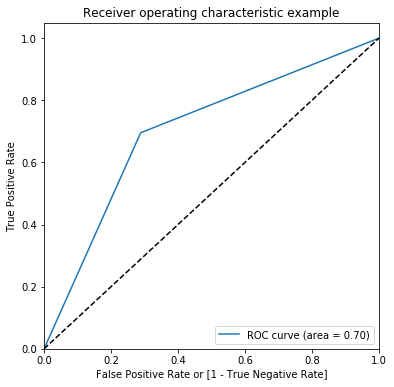

(array([0.        , 0.28857815, 1.        ]),
 array([0.        , 0.69550931, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [92]:
draw_roc(y_test_pred_final.churn, y_test_pred_final.predicted)

In [93]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_test_pred_final.churn, y_test_pred_final.Churn_Prob))

'0.76'

In [94]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

,churn,Churn_Prob,mobile_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.049254,7000739057,0,1,0,0,0,0,0,0,0,0,0
1,0,0.509261,7000767750,1,1,1,1,1,1,1,0,0,0,0
2,0,0.104345,7001211870,0,1,1,0,0,0,0,0,0,0,0
3,0,0.659273,7000472921,1,1,1,1,1,1,1,1,0,0,0
4,1,0.169470,7002388445,0,1,1,0,0,0,0,0,0,0,0


In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final[i])
    
    total1=sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.101512  1.000000  0.000000
0.1   0.1  0.194241  0.987952  0.104566
0.2   0.2  0.339893  0.943045  0.271749
0.3   0.3  0.484990  0.878423  0.440540
0.4   0.4  0.601957  0.790800  0.580621
0.5   0.5  0.709807  0.695509  0.711422
0.6   0.6  0.790749  0.559693  0.816854
0.7   0.7  0.846342  0.408543  0.895805
0.8   0.8  0.878475  0.236583  0.950996
0.9   0.9  0.895152  0.067908  0.988615


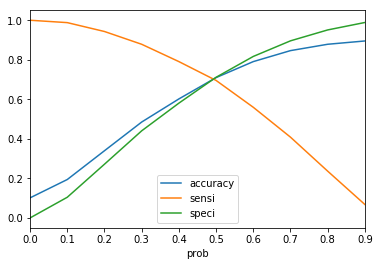

In [98]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.45 is the optimum point to take it as a cutoff probability.

In [99]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_test_pred_final.head()

,churn,Churn_Prob,mobile_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.049254,7000739057,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.509261,7000767750,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.104345,7001211870,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.659273,7000472921,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.169470,7002388445,0,1,1,0,0,0,0,0,0,0,0,0


In [100]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.final_predicted)

0.6615521458750278

In [101]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted)
confusion2

array([[5273, 2808],
       [ 236,  677]], dtype=int64)

In [102]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [103]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7415115005476451

In [104]:
# Let us calculate specificity
TN / float(TN+FP)


0.6525182526914985

In [105]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.3474817473085014


In [106]:
# Positive predictive value 
print (TP / float(TP+FP))

0.19426111908177907


In [107]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9571610092575785


##### Precision and Recall

In [108]:
#Looking at the confusion matrix again for predicted values >0.45 and >0.5 respectively

confusion = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.predicted )
confusion

array([[5749, 2332],
       [ 278,  635]], dtype=int64)

In [109]:
##### Precision for predicted value at 0.45
TP / (TP + FP)

0.19426111908177907

In [110]:
##### Precision for predicted value at 0.5
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.21402089652847994

In [111]:
##### Recall for predicted value at 0.45
TP / (TP + FN)

0.7415115005476451

In [112]:
##### Recall for predicted value at 0.5
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6955093099671413

In [113]:
### Precision and recall tradeoff

from sklearn.metrics import precision_recall_curve

y_test_pred_final.churn, y_test_pred_final.predicted


(0       0
 1       0
 2       0
 3       0
 4       1
 5       0
 6       0
 7       0
 8       0
 9       0
 10      0
 11      0
 12      1
 13      0
 14      0
 15      0
 16      1
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      0
 25      0
 26      1
 27      0
 28      0
 29      0
        ..
 8964    0
 8965    0
 8966    0
 8967    0
 8968    0
 8969    0
 8970    1
 8971    0
 8972    0
 8973    0
 8974    0
 8975    0
 8976    0
 8977    0
 8978    0
 8979    0
 8980    0
 8981    0
 8982    0
 8983    0
 8984    0
 8985    0
 8986    0
 8987    0
 8988    0
 8989    0
 8990    0
 8991    0
 8992    0
 8993    0
 Name: churn, Length: 8994, dtype: int32, 0       0
 1       1
 2       0
 3       1
 4       0
 5       0
 6       1
 7       1
 8       0
 9       0
 10      0
 11      0
 12      1
 13      0
 14      1
 15      0
 16      1
 17      0
 18      0
 19      0
 20      0
 21      0
 22      1
 23      0
 24      1
 25      0
 2

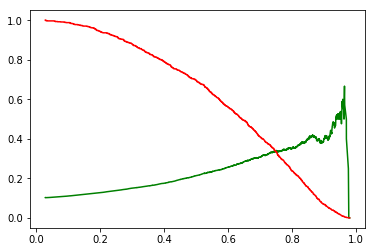

In [114]:
p, r, thresholds = precision_recall_curve(y_test_pred_final.churn, y_test_pred_final.Churn_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Feature selection
##### Applying Random Forest on the data set

In [115]:
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [116]:
# fit
rfc.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
# Making predictions
predictions = rfc.predict(X_test)

In [118]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print('classification_report: \n' , classification_report(y_test,predictions))
print('accuracy_score: \n', accuracy_score(y_test,predictions))

classification_report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      8081
           1       0.59      0.52      0.55       913

    accuracy                           0.91      8994
   macro avg       0.77      0.74      0.75      8994
weighted avg       0.91      0.91      0.91      8994

accuracy_score: 
 0.9148321102957527


In [119]:
# Printing confusion matrix
print('confusion_matrix: \n',confusion_matrix(y_test,predictions))

confusion_matrix: 
 [[7754  327]
 [ 439  474]]


##### Hyperparameter tuning

In [120]:
# Create the parameter grid based on the results of random search

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

param_grid = {
'max_depth': [4,8,10],
'min_samples_leaf': range(100, 400, 200),
'min_samples_split': range(200, 500, 200),
'n_estimators': [100,200, 300],
'max_features': [5, 10]
}

In [121]:
# Create a based model
rf = RandomForestClassifier()

In [122]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
cv = 3, n_jobs = -1,verbose = 1)

In [123]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 29.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [124]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8848050914876691 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


##### Running model with tuned hyperparameters

In [125]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100,
                             min_samples_split=400,
                             max_features=10,
                             n_estimators=200)

In [126]:
# fit
rfc.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=400,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
# predict
predictions = rfc.predict(X_test)

In [128]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8081
           1       0.47      0.73      0.57       913

    accuracy                           0.89      8994
   macro avg       0.72      0.82      0.75      8994
weighted avg       0.92      0.89      0.90      8994

[[7315  766]
 [ 244  669]]


In [129]:
# Print the name and gini importance of each feature
feature_lst = []
for feature in zip(X_train.columns, rfc.feature_importances_):
    feature_lst.append(feature)
    
features = pd.DataFrame(feature_lst, columns = ['Feature','Imp'])


features.sort_values(by='Imp', ascending = False).head(10)

,Feature,Imp
47,last_day_rch_amt_ap,0.206287
31,loc_ic_mou_ap,0.100190
13,loc_og_mou_ap,0.075641
39,total_ic_mou_ap,0.071015
27,loc_ic_t2m_mou_ap,0.067036
9,loc_og_t2m_mou_ap,0.063797
50,days_since_last_rech_ap,0.057185
23,total_og_mou_ap,0.047987
7,loc_og_t2t_mou_ap,0.033520
25,loc_ic_t2t_mou_ap,0.030995


So the above features describe the churners among the high value customers